# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import clear_output
from life_saving_tools.maths.ode import ODE

# Solving Some ODE's

## The Harmonic Oscillator

The ODE governing the motion of a particle in a harmonic oscillator is given by
$$
\frac{d^2x}{dt^2} = -\omega^2 x
$$
With initial conditions $x(0) = 0$ and $\dot{x}(0) = 0$.

To solve this, we define two varibales, $u_1 = x$ and $u_2 = \dot{x}$. Using this, we get:
$$
\dot{u_2} = -\omega^2 x\\
\dot{u_1} = u_2 \\
$$
The sysytem of equations can be written as:
$$
\frac{d}{dt}
\begin{pmatrix}
{u_1} \\
{u_2}
\end{pmatrix} = \begin{pmatrix}
 u_2\\
-\omega^2 x
\end{pmatrix}
$$
This can be rewritten as:
$$
\frac{du}{dt} = f{(x, u)}\\
\text{ where }\\
f{(x, u)} = \begin{pmatrix}
 u_2\\
-\omega^2 x
\end{pmatrix}\\
u = \begin{pmatrix}
u_1\\
u_2
\end{pmatrix}
$$

The initial conditions are:
$$
t_0 = \begin{pmatrix}
0\\
0
\end{pmatrix}\\
x_0 = \begin{pmatrix}
1\\
0
\end{pmatrix}\\
$$

Now, the equations are in a form which can be solved by the Runge-Kutta method.

In [30]:
def rk4_general(F, x, x0, y0, n=100):
    h = (x-x0)/n
    y_prev = y0
    for i in range(n):
        k1 = F(x0+i*h, y_prev)
        k2 = F(x0+(i+0.5)*h, y_prev+h*k1*0.5)
        k3 = F(x0+(i+0.5)*h, y_prev+h*k2*0.5)
        k4 = F(x0+(i+1)*h, y_prev+h*k3)
        y_prev = y_prev + (k1+2*k2+2*k3+k4)*h/6
    return y_prev

In [36]:
omega = 2*np.pi
f1 = lambda x, u1, u2: u2
f2 = lambda x, u1, u2: -omega**2*u1
def F(x, Y):
    sol = [f1(x, Y[0], Y[1]), f2(x, Y[0], Y[1])]
    return np.array(sol)

xs = np.linspace(-3, 3, 300)
ys = np.zeros((2, 300))
y0 = np.array([1, 0])
x0 = np.array([0, 0])
for i in range(300):
    ys[:, i] = rk4_general(F, xs[i], x0, y0)

In [37]:
plt.rcdefaults()

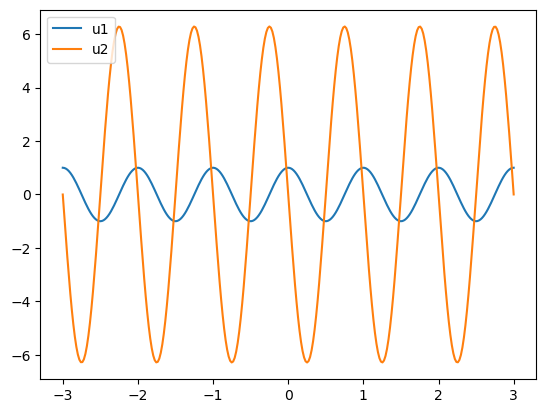

In [39]:
plt.plot(xs, ys[0], label='u1')
plt.plot(xs, ys[1], label='u2')
plt.legend();